## Name : Yashwanthra Seenivasan
## email id : yashwanthra171@gmail.com
## Data reference :  
### https://www.kaggle.com/ankit2106/indian-general-election-2019-candidate-wise-data 
### https://www.kaggle.com/themlphdstudent/lok-sabha-election-candidate-list-2004-to-2019  
### https://www.kaggle.com/awadhi123/indian-election-dataset?select=indian-national-level-election.csv
## Purpose : Analysis of Lok Shaba election based on candidate details

In [52]:
# importing necessary python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew   # to find the skewness of the features
from sklearn.preprocessing import StandardScaler # to scale down the given values
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

### To read data from the csv file

In [53]:
result2014 = pd.read_csv('Downloads\GE_india_2014_results.csv')
result2019 = pd.read_csv('Downloads\GE_india_2019_results.csv')
indlevel = pd.read_csv('Downloads\indian-national-level-election-data-1977-2015.csv')
cad0419 = pd.read_csv('Downloads\LokSabha2004-2019.csv')
cad2019 = pd.read_csv('Downloads\lok-sabha-candidate-details-2019.csv')

### To handle Null values in the dataset

In [3]:
# to obtain respective null values in the each column of the dataset
print(result2014.isnull().sum()) 
print(result2019.isnull().sum())
print(indlevel.isnull().sum())
print(cad0419.isnull().sum())
print(cad2019.isnull().sum())

state/ut          0
PC                0
candidate_name    0
party             0
evm_votes         0
postal_votes      0
total_votes       0
Rank              0
dtype: int64
state/ut             0
PC                   0
candidate_name       0
party                0
evm_votes            0
postal_votes         0
migrant_votes     8483
total_votes          0
percent_votes        0
rank                 0
dtype: int64
st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64
Candidate           0
Party               0
Criminal Cases      0
Education           0
Age                 0
Total Assets      417
Constituency        0
Liabilities         0
Winner              0
Gender              0
dtype: int64
STATE                                          0
CONSTITUENCY                                   0
NAME                           

#### Handling null values in result2019 dataframe

In [54]:
# filling the null values in migrant_votes with zero
result2019 = result2019.fillna(0)
result2019['migrant_votes'] = result2019['migrant_votes'].astype('int64')
result2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state/ut        8568 non-null   object 
 1   PC              8568 non-null   object 
 2   candidate_name  8568 non-null   object 
 3   party           8568 non-null   object 
 4   evm_votes       8568 non-null   int64  
 5   postal_votes    8568 non-null   int64  
 6   migrant_votes   8568 non-null   int64  
 7   total_votes     8568 non-null   int64  
 8   percent_votes   8568 non-null   float64
 9   rank            8568 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 669.5+ KB


#### Handling null values in indlevel dataframe

In [5]:
indlevel = indlevel.fillna({
    'pc_type':'Not mentioned',
    'cand_sex':'NOTA'
})
indlevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     73081 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    73081 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


#### Handling null values in cad0419 dataframe

In [55]:
cad0419 = cad0419.fillna({'Total Assets':0})
cad0419['Total Assets'] = cad0419['Total Assets'].astype('int64')
cad0419 = cad0419.rename(columns ={'Criminal Cases':'Criminal_Cases','Total Assets':'Total_Assets'})
cad0419.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       7920 non-null   object
 1   Party           7920 non-null   object
 2   Criminal_Cases  7920 non-null   int64 
 3   Education       7920 non-null   object
 4   Age             7920 non-null   int64 
 5   Total_Assets    7920 non-null   int64 
 6   Constituency    7920 non-null   object
 7   Liabilities     7920 non-null   int64 
 8   Winner          7920 non-null   int64 
 9   Gender          7920 non-null   object
dtypes: int64(5), object(5)
memory usage: 618.9+ KB


#### Handling null values in cad2019 dataframe

In [56]:
cad2019 = cad2019.fillna({
    'SYMBOL':'NOTA',
    'GENDER' :'NOTA',
    'AGE':0,
    'CATEGORY':'NOTA',
    'EDUCATION':'NOTA',
    'ASSETS':'NOTA',
    'LIABILITIES':'NOTA',
    'CRIMINAL\nCASES': 0
})
cad2019['AGE'] = cad2019['AGE'].astype('int64')
cad2019['CRIMINAL\nCASES'] = cad2019['CRIMINAL\nCASES'].replace('0',0)
cad2019['CRIMINAL\nCASES'] = cad2019['CRIMINAL\nCASES'].replace('Not Available',-1)
cad2019['CRIMINAL\nCASES'] = cad2019['CRIMINAL\nCASES'].astype('int64')
#print(cad2019['ASSETS'].value_counts())
#cad2019['ASSETS'] = cad2019['ASSETS'].replace('Nil','Rs 0')
print(cad2019['EDUCATION'].value_counts())
cad2019['EDUCATION'] = cad2019['EDUCATION'].replace('Post Graduate\n','Post Graduate')
cad2019 = cad2019.rename(columns ={'CRIMINAL\nCASES':'CRIMINAL_CASES','GENERAL\nVOTES':'GENERAL_VOTES',
                                   'POSTAL\nVOTES':'POSTAL_VOTES','TOTAL\nVOTES':'TOTAL_VOTES',
                                  'OVER TOTAL ELECTORS \nIN CONSTITUENCY': 'OVER_TOTAL_ELECTORS_IN_CONSTITUENCY',
                                  'TOTAL ELECTORS':'TOTAL_ELECTORS',
                                   'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY':'OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY'
                                  })
cad2019.info()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
NOTA                     245
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                           

### Handling skewness

In [57]:
from scipy.stats import skew

evm_votes
Skewness : 2.5798067869420898


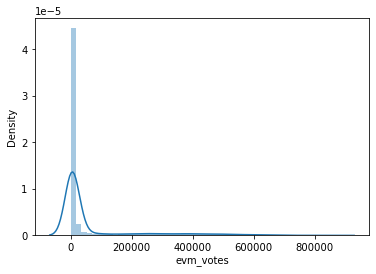

postal_votes
Skewness : 6.796961614436627


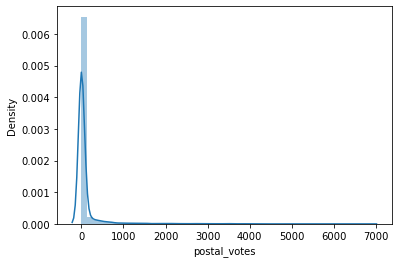

total_votes
Skewness : 2.5812820403309695


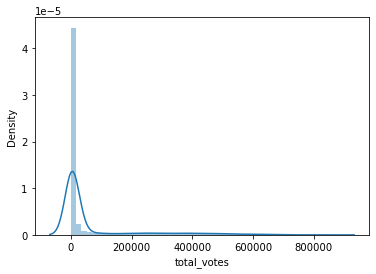

Rank
Skewness : 1.0561399202646522


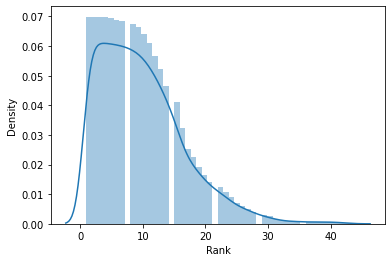

evm_votes
Skewness after transformation : 0.8449048187252722


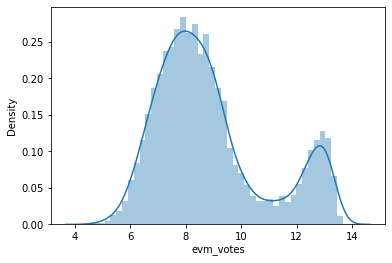

postal_votes
Skewness after transformation : 3.5772160896519627


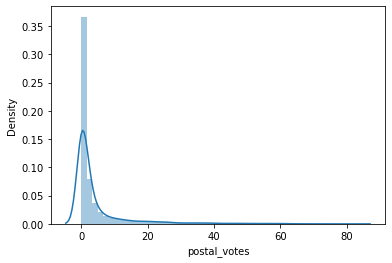

total_votes
Skewness after transformation : 0.8450538944790821


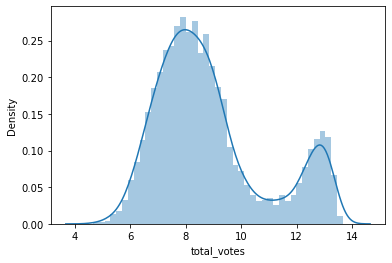

Rank
Skewness after transformation : 0.15804342990558723


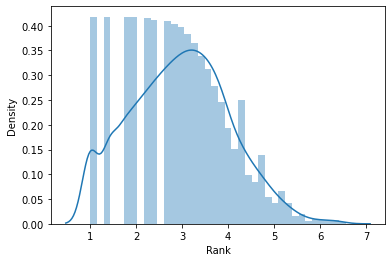

In [9]:
result2014_num = result2014.select_dtypes(['int64','float64'])
result2014_cat = result2014.select_dtypes(object)
for col in result2014_num:
    print(col)
    print("Skewness :",skew(result2014_num[col]))
    plt.figure(figsize=(6,4,))
    sns.distplot(result2014_num[col])
    plt.show()
result2014_num['Rank'] = np.sqrt(result2014_num['Rank'])
result2014_num['evm_votes'] = np.log(result2014_num['evm_votes'])
result2014_num['postal_votes'] = np.sqrt(result2014_num['postal_votes'])
result2014_num['total_votes'] = np.log(result2014_num['total_votes'])
for col in result2014_num:
    print(col)
    print("Skewness after transformation :",skew(result2014_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(result2014_num[col])
    plt.show()

evm_votes
Skewness : 2.6442524040147988


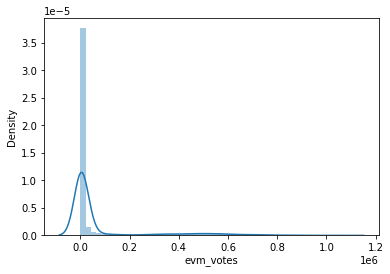

postal_votes
Skewness : 7.112129459996886


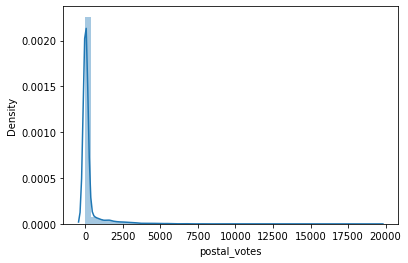

migrant_votes
Skewness : 74.75414996418263


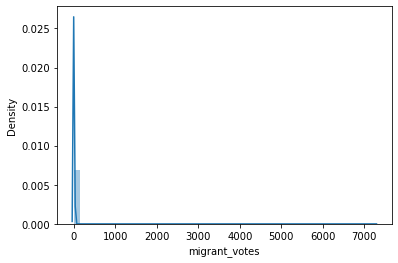

total_votes
Skewness : 2.644678451204991


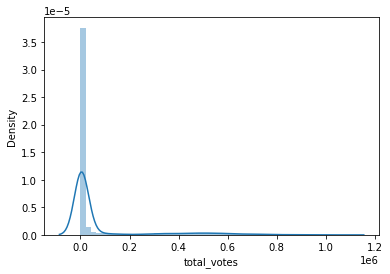

percent_votes
Skewness : 2.4736166619469118


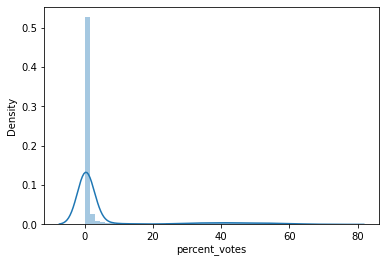

rank
Skewness : 6.552690820107599


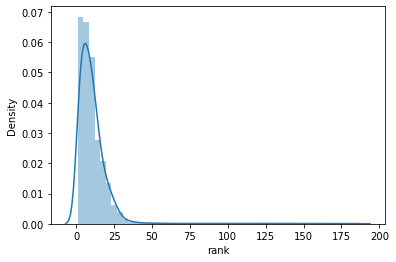

evm_votes
Skewness after transformation : 0.9511433044955808


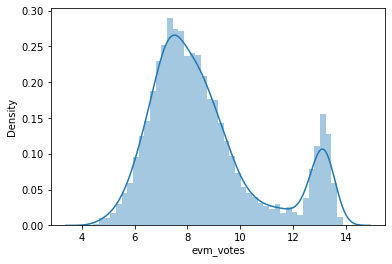

total_votes
Skewness after transformation : 0.9514162228795434


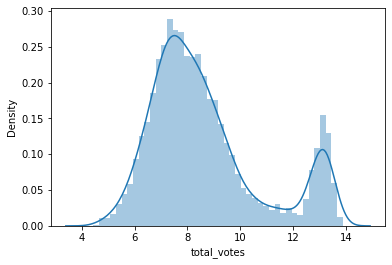

percent_votes
Skewness after transformation : 0.9457736522943135


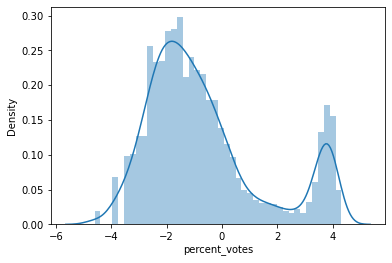

In [10]:
result2019_num = result2019.select_dtypes(['int64','float64'])
result2019_cat = result2019.select_dtypes(object)
for col in result2019_num:
    print(col)
    print("Skewness :",skew(result2019_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(result2019_num[col],kde = True)
    plt.show()
result2019_num['evm_votes'] = np.log(result2019_num['evm_votes'])
result2019_num['postal_votes'] = np.log(result2019_num['postal_votes']+1)
result2019_num['migrant_votes'] = np.log(result2019_num['migrant_votes']+1)
result2019_num['total_votes'] = np.log(result2019_num['total_votes'])
result2019_num['percent_votes'] = np.log(result2019_num['percent_votes'])
cols = ['evm_votes','total_votes','percent_votes']
for col in cols:
    print(col)
    print("Skewness after transformation :",skew(result2019_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(result2019_num[col])
    plt.show()

year
Skewness : 0.05957449638260244


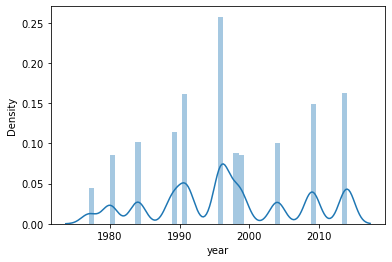

pc_no
Skewness : 1.1811484433319206


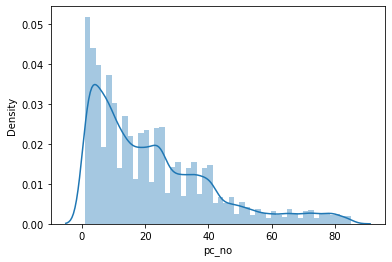

totvotpoll
Skewness : 2.5348013274423975


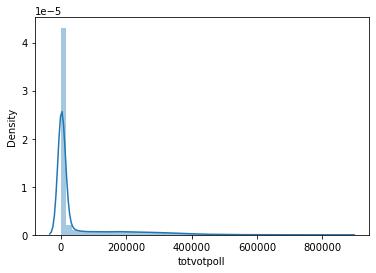

electors
Skewness : 0.6664439950697013


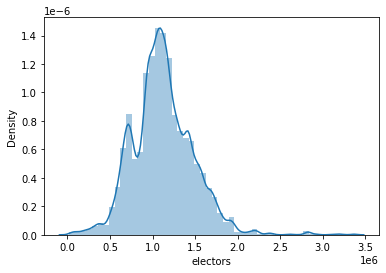

year
Skewness after transformation : 0.05957449638260244


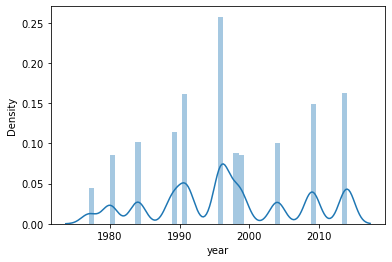

pc_no
Skewness after transformation : 0.33557423850515966


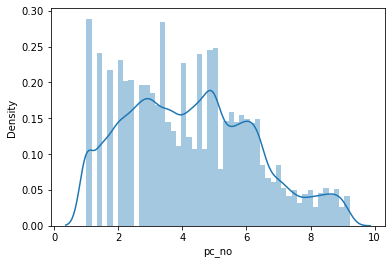

totvotpoll
Skewness after transformation : 0.49599956697288944


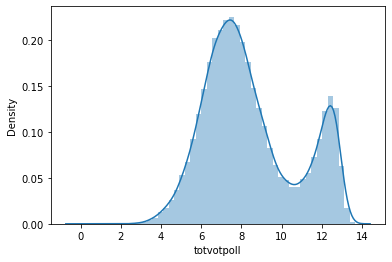

electors
Skewness after transformation : 0.6664439950697013


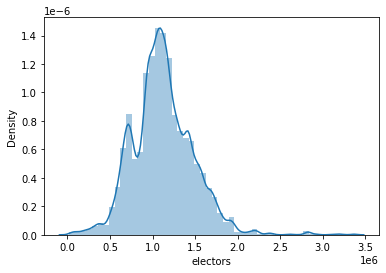

In [11]:
indlevel_num = indlevel.select_dtypes(['int64','float64'])
indlevel_cat = indlevel.select_dtypes(object)
for col in indlevel_num:
    print(col)
    print("Skewness :",skew(indlevel_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(indlevel_num[col])
    plt.show()
indlevel_num['totvotpoll'] = np.log(indlevel_num['totvotpoll'] +1)
indlevel_num['pc_no'] = np.sqrt(indlevel_num['pc_no'])
indlevel_num['totvotpoll'].skew(axis=0)
for col in indlevel_num:
    print(col)
    print("Skewness after transformation :",skew(indlevel_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(indlevel_num[col])
    plt.show()

Criminal_Cases
12.036201941611289


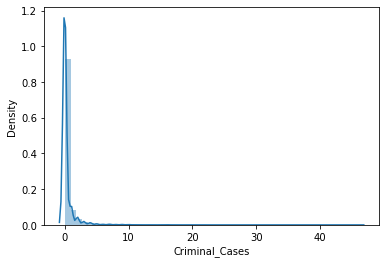

Age
0.39104636613805177


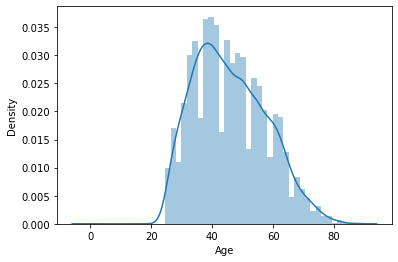

Total_Assets
61.42853855755528


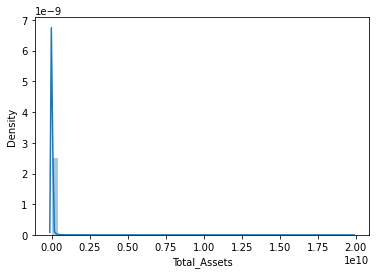

Liabilities
32.86505920126412


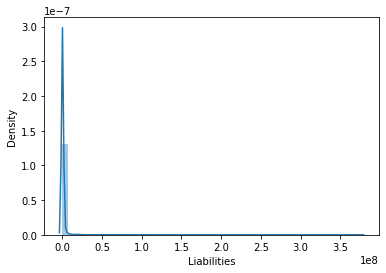

Winner
4.350442426642171


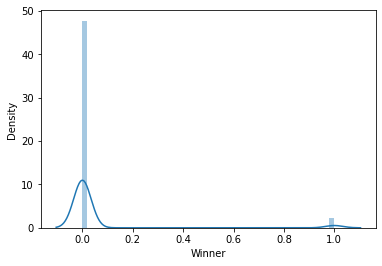

Criminal_Cases
3.317982322133423


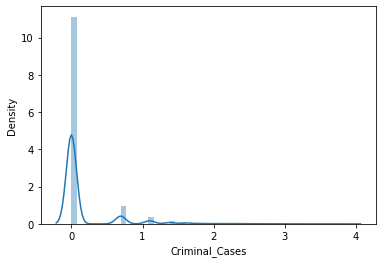

Age
0.39104636613805177


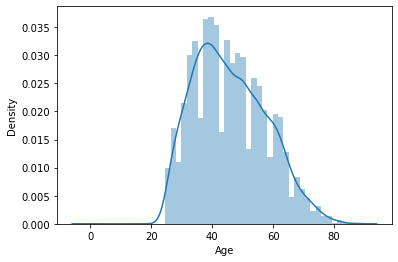

Total_Assets
-1.8372367767357738


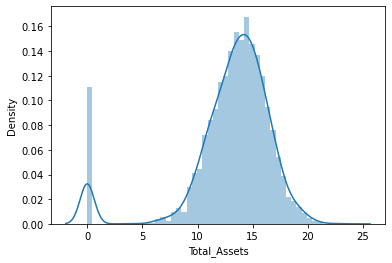

Liabilities
0.7886546346665195


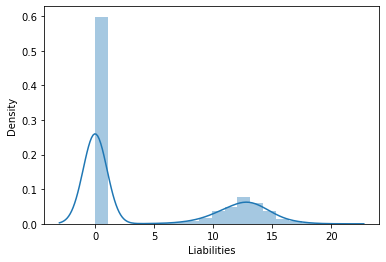

Winner
4.350442426642173


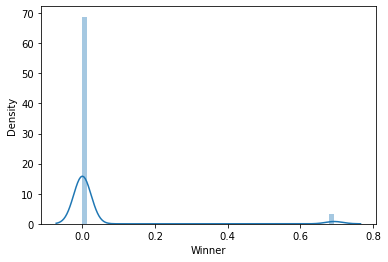

In [12]:
cad0419_num = cad0419.select_dtypes(['int64','float64'])
cad0419_cat = cad0419.select_dtypes(object)
for col in cad0419_num:
    print(col)
    print(skew(cad0419_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(cad0419_num[col])
    plt.show()
cad0419_num['Criminal_Cases'] = np.log(cad0419_num['Criminal_Cases']+1)
cad0419_num['Liabilities'] = np.log(cad0419_num['Liabilities']+1)
cad0419_num['Total_Assets'] = np.log(cad0419_num['Total_Assets']+1)
cad0419_num['Winner'] = np.log(cad0419_num['Winner'] +1)
for col in cad0419_num:
    print(col)
    print(skew(cad0419_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(cad0419_num[col])
    plt.show()

WINNER
1.2292927973209922


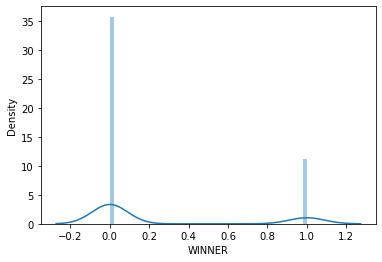

CRIMINAL_CASES
26.201609881243872


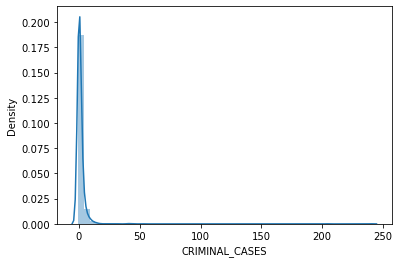

AGE
-1.1404035614951689


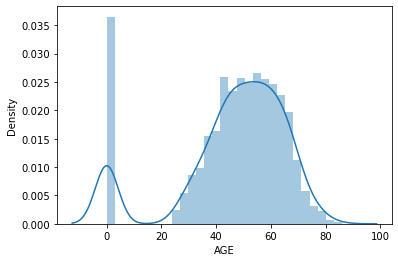

GENERAL_VOTES
0.5648119666833245


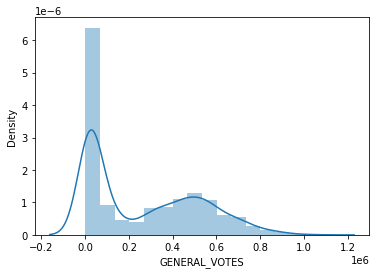

POSTAL_VOTES
3.840159739319097


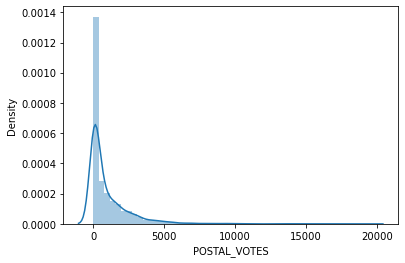

TOTAL_VOTES
0.5652426233055221


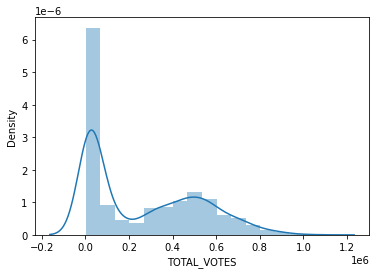

OVER_TOTAL_ELECTORS_IN_CONSTITUENCY
0.4587053499476336


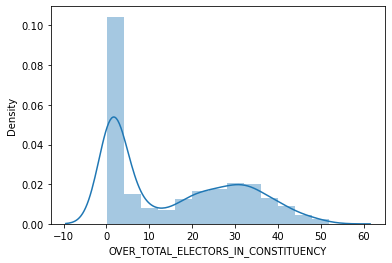

OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY
0.3882721042724212


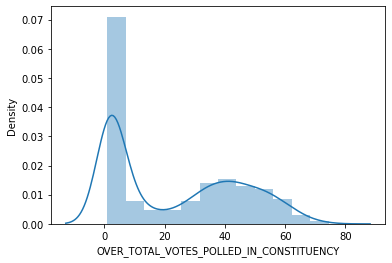

TOTAL_ELECTORS
-1.2729419905311434


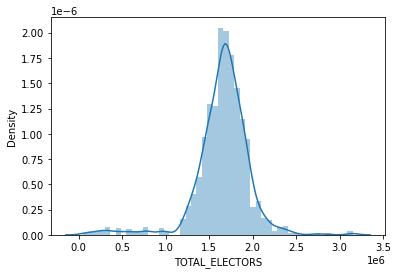

WINNER
1.2292927973209922


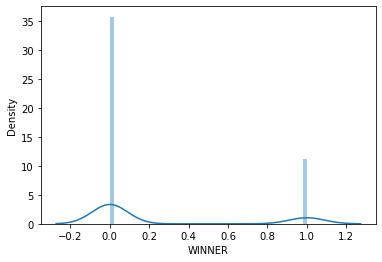

CRIMINAL_CASES
26.201609881243872


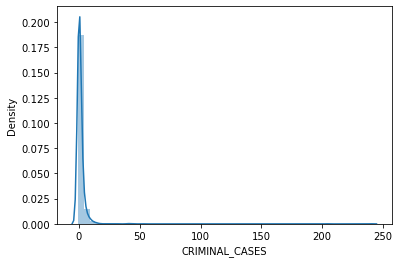

AGE
-1.1404035614951689


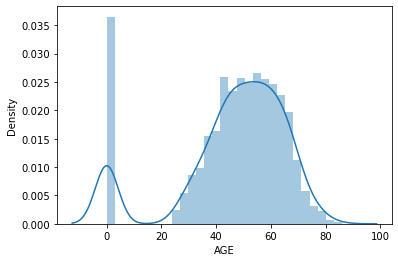

GENERAL_VOTES
0.5648119666833245


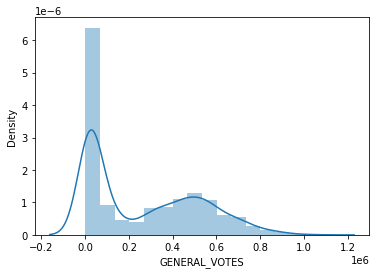

POSTAL_VOTES
-0.552935183947368


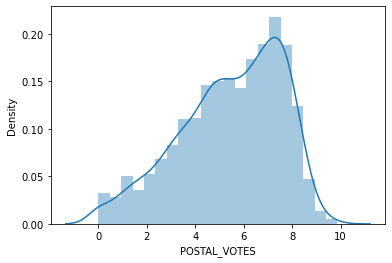

TOTAL_VOTES
0.5652426233055221


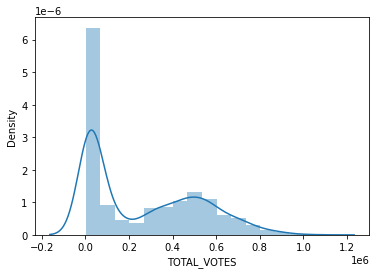

OVER_TOTAL_ELECTORS_IN_CONSTITUENCY
0.4587053499476336


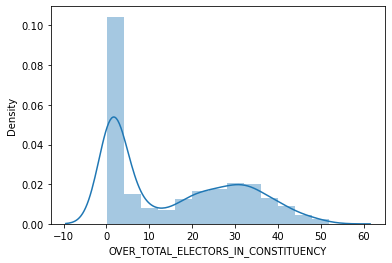

OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY
0.3882721042724212


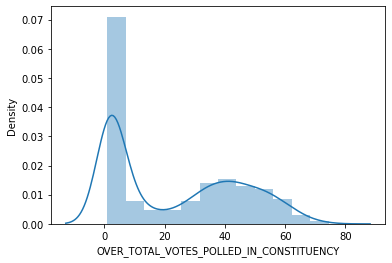

TOTAL_ELECTORS
0.467035455916717


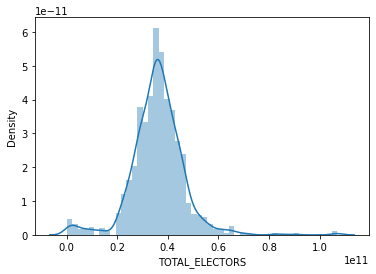

In [13]:
cad2019_num = cad2019.select_dtypes(['int64','float64'])
cad2019_cat = cad2019.select_dtypes(object)
for col in cad2019_num:
    print(col)
    print(skew(cad2019_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(cad2019_num[col])
    plt.show()
cad2019_num['TOTAL_ELECTORS']= stats.boxcox(cad2019_num['TOTAL_ELECTORS'])[0]
pd.Series(cad2019_num['TOTAL_ELECTORS']).skew()
cad2019_num['WINNER'] = np.sqrt(cad2019_num['WINNER'])
cad2019_num['POSTAL_VOTES'] = np.log(cad2019_num['POSTAL_VOTES']+1)
for col in cad2019_num:
    print(col)
    print(skew(cad2019_num[col]))
    plt.figure(figsize=(6,4))
    sns.distplot(cad2019_num[col])
    plt.show()

### Scaling down the data

In [58]:
for col in result2014_num:
    ss = StandardScaler()
    result2014_num[col] = ss.fit_transform(result2014_num[[col]]) 
new_results2014 = pd.concat([result2014_cat,result2014_num],axis=1)


for col in result2019_num:
    ss = StandardScaler()
    result2019_num[col] = ss.fit_transform(result2019_num[[col]]) 
new_results2019 = pd.concat([result2019_cat,result2019_num],axis=1)


for col in indlevel_num:
    ss = StandardScaler()
    indlevel_num[col] = ss.fit_transform(indlevel_num[[col]]) 
new_indlevel = pd.concat([indlevel_cat,indlevel_num],axis=1)


for col in cad0419_num:
    ss = StandardScaler()
    cad0419_num[col] = ss.fit_transform(cad0419_num[[col]]) 
new_cad0419 = pd.concat([cad0419_cat,cad0419_num],axis=1)


for col in cad2019_num:
    ss = StandardScaler()
    cad2019_num[col] = ss.fit_transform(cad2019_num[[col]]) 
new_cad2019 = pd.concat([cad2019_cat,cad2019_num],axis=1)

### General plots for analysis

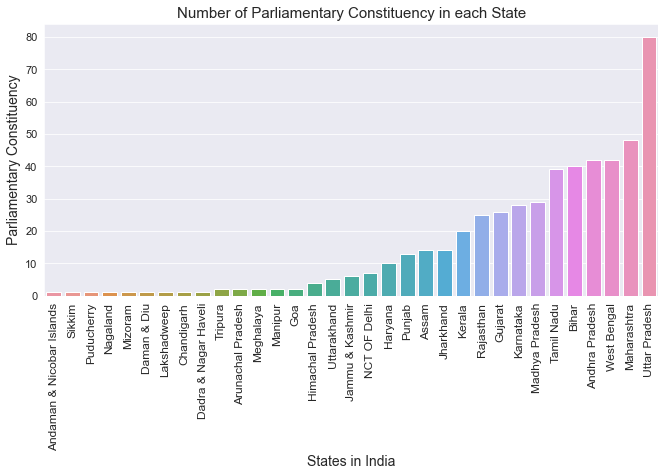

In [15]:
# plot for the number of Parliamentary Constituency in each state
sns.set_style('darkgrid')

df2 = result2014[result2014['Rank'] == 1]
li =  list(df2.groupby(['state/ut'])['PC'].agg('count'))
states= list(np.sort(result2014['state/ut'].unique()))
dftemp = pd.DataFrame(states, columns=['States'])
dftemp['PC_count'] = li

plt.figure(figsize=(11,5))
sns.barplot(x='States',y='PC_count',data = dftemp,ci = None, order = dftemp.sort_values('PC_count').States)
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 11)
plt.ylabel("Parliamentary Constituency",fontsize = 14)
plt.xlabel("States in India", fontsize = 14)
plt.title("Number of Parliamentary Constituency in each State",fontsize = 15)
plt.show()

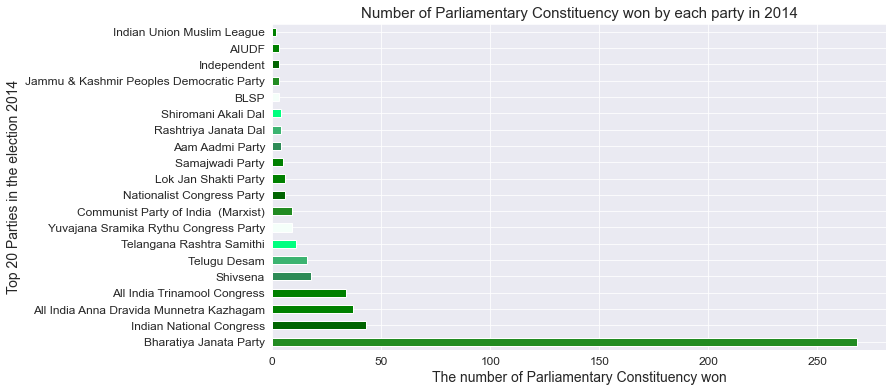

In [16]:
# the majority party of the election 2014
plt.figure(figsize=(11,6))
df3 = result2014.loc[result2014.groupby(["PC"])["total_votes"].idxmax()] 
df3['party'].value_counts()[:20].plot(kind='barh',color=['forestgreen', 'darkgreen', 'green', 'g','seagreen',
                                                         'mediumseagreen','springgreen','mintcream'],fontsize=12)
plt.xlabel("The number of Parliamentary Constituency won",fontsize=14)
plt.ylabel("Top 20 Parties in the election 2014",fontsize = 14)
plt.title("Number of Parliamentary Constituency won by each party in 2014",fontsize=15)
plt.show()

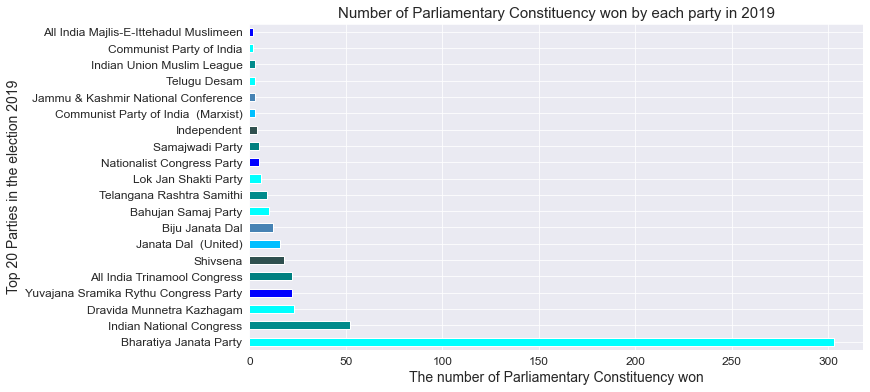

In [17]:
# the majority party of the election 2019
plt.figure(figsize=(11,6))
df4 = result2019[result2019['rank']==1]
df4['party'].value_counts()[:20].plot(kind='barh',color=['cyan', 'darkcyan', 'aqua', 'b','teal',
                                                         'darkslategray','deepskyblue','steelblue'],fontsize=12)
plt.xlabel("The number of Parliamentary Constituency won",fontsize=14)
plt.ylabel("Top 20 Parties in the election 2019",fontsize = 14)
plt.title("Number of Parliamentary Constituency won by each party in 2019",fontsize=15)
plt.show()

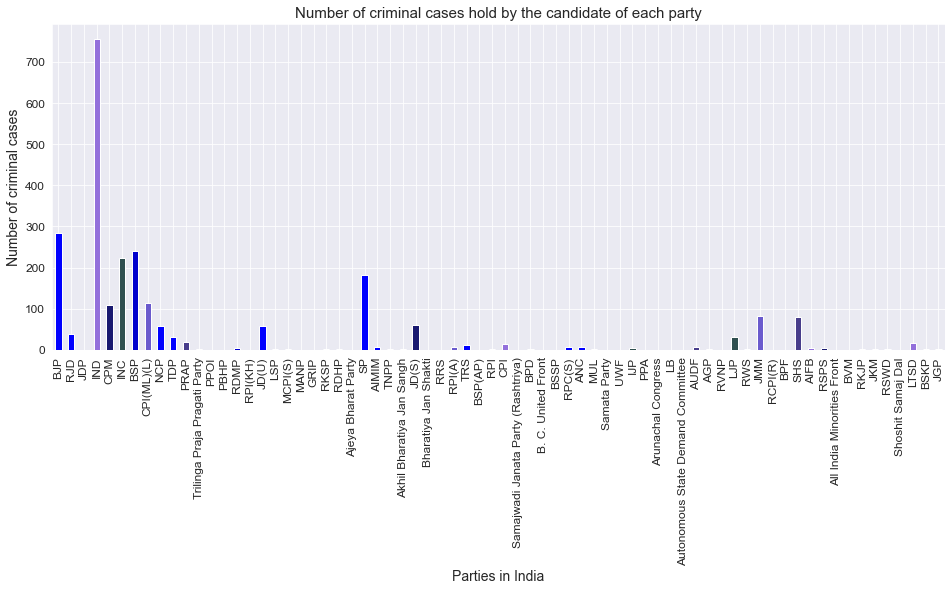

In [18]:
# parties with cadidates who have huge number of criminal cases
plt.figure(figsize = (16,6))
cad0419.groupby(['Party'],sort =False)['Criminal_Cases'].agg('sum')[:70].plot(kind ='bar',color=['blue', 'b', 'darkslateblue', 
                                            'mediumpurple','midnightblue','darkslategray','mediumblue','slateblue'],fontsize=12)
plt.xlabel("Parties in India",fontsize=14)
plt.ylabel("Number of criminal cases",fontsize = 14)
plt.title("Number of criminal cases hold by the candidate of each party",fontsize=15)
plt.show()

### Influence of criminals over winning Lok Shaba elections

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
# ANOVA TEST for criminal_case and Winner bet 2004 - 2019
modcw = ols('Criminal_Cases~Winner',data = cad0419).fit()
aovcw = sm.stats.anova_lm(modcw,type= 2)
print(aovcw)

              df        sum_sq    mean_sq          F    PR(>F)
Winner       1.0     52.878503  52.878503  19.441402  0.000011
Residual  7918.0  21536.100159   2.719891        NaN       NaN


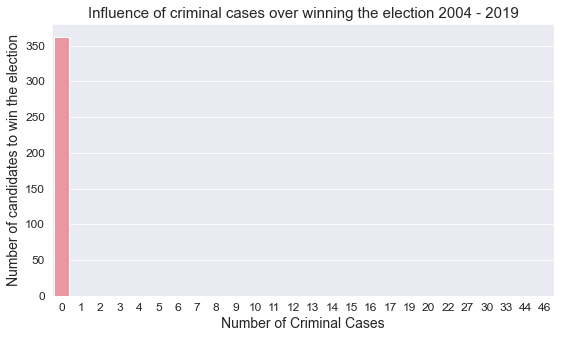

In [21]:
plt.figure(figsize=(9,5))
y =list(cad0419.groupby(['Criminal_Cases'])['Winner'].agg('sum'))
x1 = np.sort(cad0419['Criminal_Cases'].unique())
plt.title("Influence of criminal cases over winning the election 2004 - 2019",fontsize=15)
plt.xlabel("Number of Criminal Cases",fontsize=14)
plt.ylabel("Number of candidates to win the election",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.barplot(x=x1,y=y)
plt.show()

In [22]:
# ANOVA TEST for criminal_case and Winner for 2019
modCW = ols('CRIMINAL_CASES~WINNER',data = cad2019).fit()
aovCW = sm.stats.anova_lm(modCW,type= 2)
print(aovCW)

              df         sum_sq     mean_sq         F    PR(>F)
WINNER       1.0     273.993643  273.993643  5.254232  0.021985
Residual  2261.0  117904.881301   52.147227       NaN       NaN


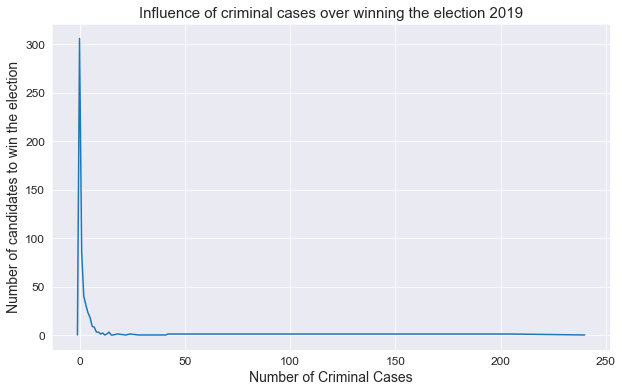

In [23]:
import math
plt.figure(figsize=(10,6)) 
y =list(cad2019.groupby(['CRIMINAL_CASES'])['WINNER'].agg('sum'))
x1 = np.sort(cad2019['CRIMINAL_CASES'].unique())
plt.plot(x1,y)
plt.title("Influence of criminal cases over winning the election 2019",fontsize=15)
plt.xlabel("Number of Criminal Cases",fontsize=14)
plt.ylabel("Number of candidates to win the election",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Presence of female candidate influences the Lok Shaba election 

In [24]:
# ANOVA TEST for Gender and winner of the election bet 2004 - 2019
modwg = ols('Winner~Gender',data = cad0419).fit()
aovwg = sm.stats.anova_lm(modwg,type= 2)
print(aovwg)

              df      sum_sq   mean_sq          F        PR(>F)
Gender       1.0    1.398206  1.398206  32.177911  1.456348e-08
Residual  7918.0  344.055834  0.043452        NaN           NaN


In [59]:
print(cad0419['Gender'].value_counts())

print(cad0419.groupby(['Gender'])['Winner'].agg('sum'))

M    7469
F     451
Name: Gender, dtype: int64
Gender
F     45
M    317
Name: Winner, dtype: int64


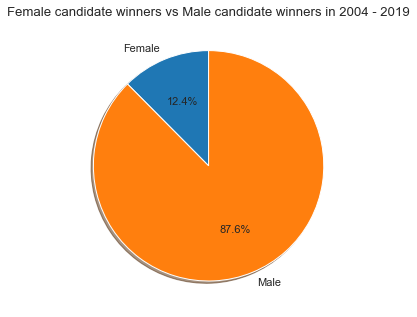

In [25]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11
fig = plt.figure() 
ax = fig.add_axes([0.1,0.1,1,1])
y =list(cad0419.groupby(['Gender'])['Winner'].agg('sum'))
x1 = ['Female','Male']
plt.pie(y,labels = x1,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Female candidate winners vs Male candidate winners in 2004 - 2019")
plt.show()

In [26]:
# ANOVA TEST for Gender and winner of the election 2019
modWG = ols('WINNER~GENDER',data = cad2019).fit()
aovWG = sm.stats.anova_lm(modWG,type= 2)
print(aovWG)

              df      sum_sq   mean_sq         F        PR(>F)
GENDER       2.0   15.809464  7.904732  45.24863  5.395350e-20
Residual  2260.0  394.811835  0.174696       NaN           NaN


In [60]:
print(cad2019['GENDER'].value_counts())

print(cad2019.groupby(['GENDER'])['WINNER'].agg('sum'))

MALE      1760
FEMALE     258
NOTA       245
Name: GENDER, dtype: int64
GENDER
FEMALE     76
MALE      463
NOTA        0
Name: WINNER, dtype: int64


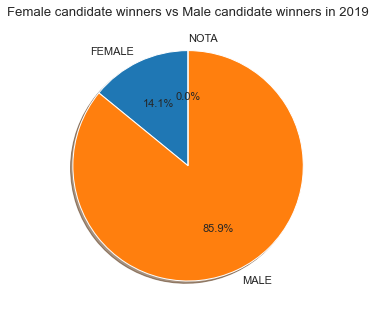

In [28]:
fig = plt.figure() 
ax = fig.add_axes([0.1,0.1,1,1])
y =list(cad2019.groupby(['GENDER'])['WINNER'].agg('sum'))
x1 = np.sort(cad2019['GENDER'].unique())
plt.pie(y,labels = x1,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Female candidate winners vs Male candidate winners in 2019")
plt.show()

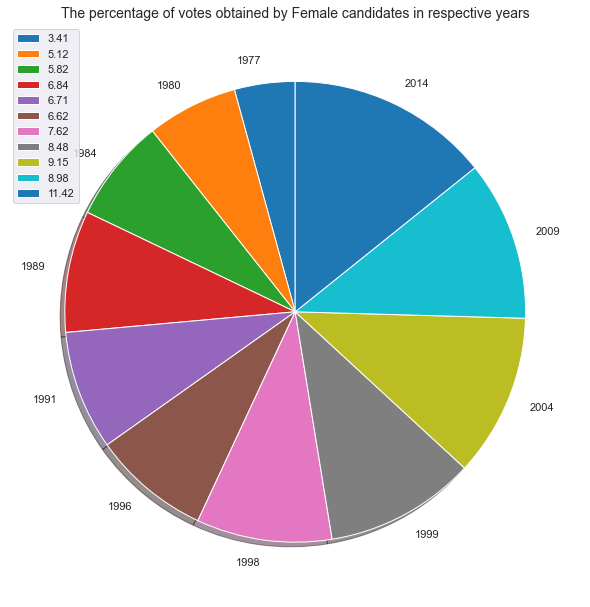

In [29]:
# the percent of votes obtained in election by the female candidate from 1977 - 2015

li = list(indlevel.groupby(['year','cand_sex'])['totvotpoll'].agg('sum'))
percent =[]
for i in range(0,len(li)-2):
    if(i%2==0):
        temp = li[i]/(li[i] + li[i+1])
        percent.append(round((temp * 100),2))
    else:
        continue
years = list(indlevel['year'].unique())

fig = plt.figure() 
ax = fig.add_axes([0.1,0.1,2,2])
plt.pie(percent,labels = years, shadow=True, startangle=90)
plt.legend(percent)
plt.title("The percentage of votes obtained by Female candidates in respective years",fontsize = 14)
plt.show()

### The states with the elected candidates and their criminal cases

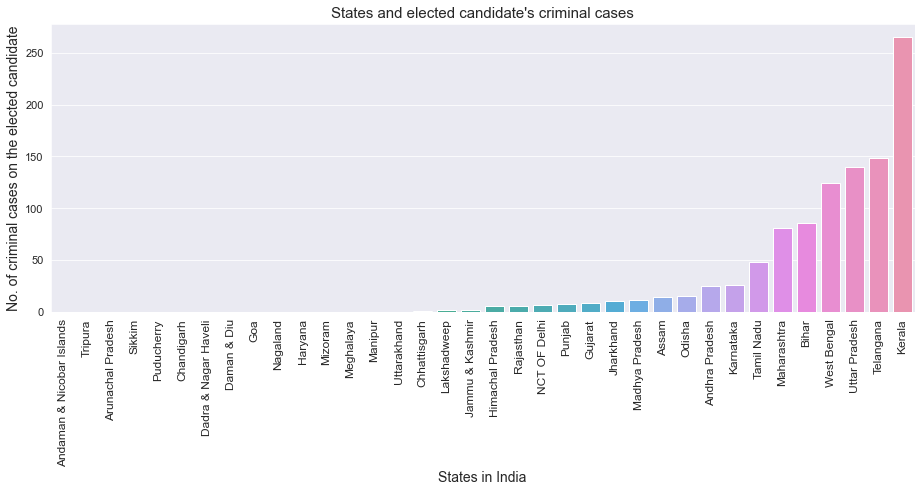

In [30]:
df = cad2019[cad2019['WINNER'] == 1]
y = list(df.groupby(['STATE'])['CRIMINAL_CASES'].agg('sum'))
x = np.sort(cad2019['STATE'].unique())
dftemp1 = pd.DataFrame(x, columns=['States'])
dftemp1['criminal_cases'] = y

fig = plt.figure() 
ax = fig.add_axes([0.1,0.1,2,1])
#plt.bar(x,y)
sns.barplot(x='States',y='criminal_cases', data = dftemp1, order = dftemp1.sort_values('criminal_cases').States)
plt.xticks(rotation = 90,fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('States in India',fontsize=14)
plt.ylabel('No. of criminal cases on the elected candidate',fontsize=14)
plt.title("States and elected candidate's criminal cases",fontsize=15)
plt.show()

### The elected members and their educational qualification

In [31]:
# ANOVA TEST on winner and educational qualification of a candidate bet 2004- 2019
modwe = ols('Winner~Education',data = cad0419).fit()
aovwe = sm.stats.anova_lm(modwe,type= 2)
print(aovwe)

               df      sum_sq   mean_sq          F        PR(>F)
Education    11.0   11.047878  1.004353  23.750819  8.741425e-49
Residual   7908.0  334.406162  0.042287        NaN           NaN


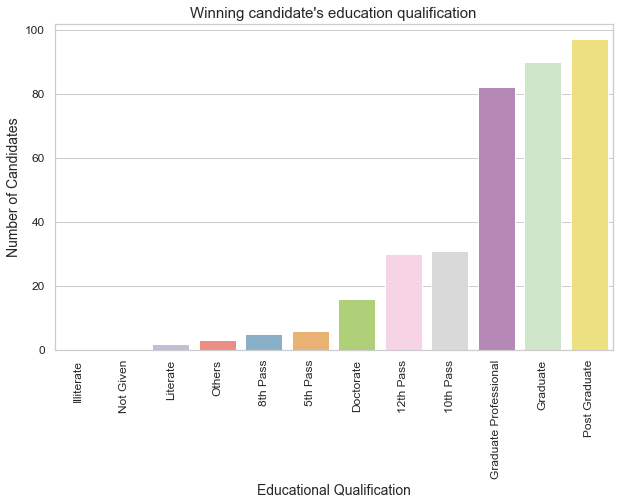

In [32]:
li = list(cad0419.groupby(['Education'])['Winner'].agg('sum'))
edu = np.sort(cad0419['Education'].unique())
dftemp2 = pd.DataFrame(li,columns=['num_of_cad'])
dftemp2['edu'] = edu

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="edu", y="num_of_cad",
                   data=dftemp2, palette="Set3", order = dftemp2.sort_values('num_of_cad').edu)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Educational Qualification",fontsize=14)
plt.ylabel("Number of Candidates",fontsize=14)
plt.title("Winning candidate's education qualification",fontsize=15)
plt.show()

In [33]:
# ANOVA TEST for winner - eduaction in 2019
modWE = ols('WINNER~EDUCATION',data = cad2019).fit()
aovWE = sm.stats.anova_lm(modWE,type= 2)
print(aovWE)

               df      sum_sq   mean_sq          F        PR(>F)
EDUCATION    12.0   21.240530  1.770044  10.228033  6.868338e-20
Residual   2250.0  389.380769  0.173058        NaN           NaN


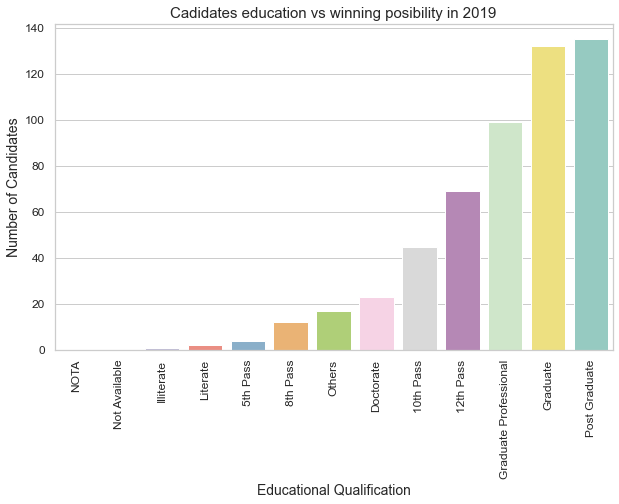

In [34]:
li = list(cad2019.groupby(['EDUCATION'])['WINNER'].agg('sum'))
edu = np.sort(cad2019['EDUCATION'].unique())
dftemp3 = pd.DataFrame(li,columns=['num_of_cad'])
dftemp3['edu'] = edu

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="edu", y="num_of_cad",
                   data=dftemp3, palette="Set3", order = dftemp3.sort_values('num_of_cad').edu)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Educational Qualification",fontsize=14)
plt.ylabel("Number of Candidates",fontsize=14)
plt.title("Cadidates education vs winning posibility in 2019",fontsize=15)
plt.show()

In [61]:
# MP'S and educational qualities in 2004 - 2019
cad0419.groupby(['Education'])['Winner'].agg('sum')

Education
10th Pass                31
12th Pass                30
5th Pass                  6
8th Pass                  5
Doctorate                16
Graduate                 90
Graduate Professional    82
Illiterate                0
Literate                  2
Not Given                 0
Others                    3
Post Graduate            97
Name: Winner, dtype: int64

In [62]:
# MP'S and educational qualities in 2019
cad2019.groupby(['EDUCATION'])['WINNER'].agg('sum')

EDUCATION
10th Pass                 45
12th Pass                 69
5th Pass                   4
8th Pass                  12
Doctorate                 23
Graduate                 132
Graduate Professional     99
Illiterate                 1
Literate                   2
NOTA                       0
Not Available              0
Others                    17
Post Graduate            135
Name: WINNER, dtype: int64